In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("churn_prediction.csv")

Exploratory Data Analysis


Exploratory data analysis (EDA) is an iterative process of examining and summarizing data with the goal of gaining insights and understanding its characteristics. It is an essential step in data analysis, as it helps to identify patterns, trends, and outliers in the data, which can then inform subsequent modeling and analysis tasks. EDA typically involves a combination of techniques, including descriptive statistics, data visualization, and statistical hypothesis testing.


In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
df.shape

(28382, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [6]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

This code snippet uses the KNN imputation technique provided by scikit-learn's KNNImputer to fill in missing values in the specified columns of the DataFrame df by considering the five nearest neighbors' information.


In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['dependents','city']] = imputer.fit_transform(df[['dependents','city']])

In [8]:
#This below code helps to impute the missing values in Categorical variabels.
from sklearn.impute import SimpleImputer


s_imp = SimpleImputer(strategy = 'most_frequent')
s_imp = s_imp.fit(df[['gender','occupation']])
df[['gender','occupation']] = s_imp.transform(df[['gender','occupation']])

In [9]:
df.isnull().sum()


customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

Summary Statistics


Summary statistics are a set of numerical values that describe the key characteristics of a data set. They provide a concise overview of the data, highlighting its central tendency, spread, and shape. These statistics are essential for understanding and interpreting data, and they play a crucial role in exploratory data analysis (EDA) and statistical modeling.


In [10]:
df.describe()


,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.349847,803.699534,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.964509,430.772927,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,848.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [11]:
if df.duplicated().any():
    print('There are duplicates in data')
else:
    print('There are no duplicates')

There are no duplicates


Outliers can cause a huge trouble while analyzing a data or building an ML model. So, its important to deal with them in first priority

0.0005049766342995658
-1.1997258491751799
count    28382.000000
mean     15143.508667
std       8746.454456
min          1.000000
25%       7557.250000
50%      15150.500000
75%      22706.750000
max      30301.000000
Name: customer_id, dtype: float64


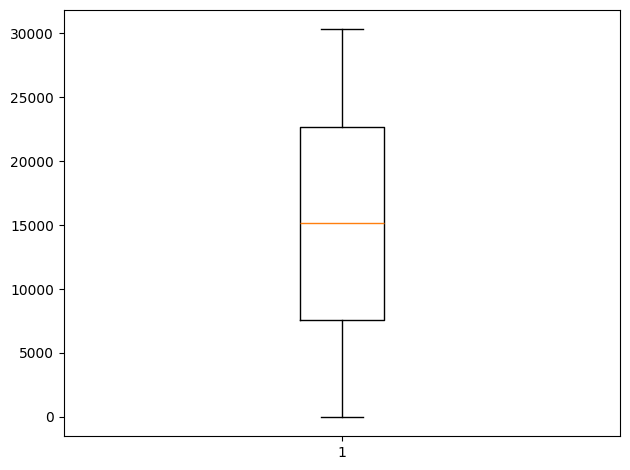

-1.3889357082821185
2.7234245375227926
count    28382.000000
mean      2091.144105
std        272.676775
min         73.000000
25%       1958.000000
50%       2154.000000
75%       2292.000000
max       2476.000000
Name: vintage, dtype: float64


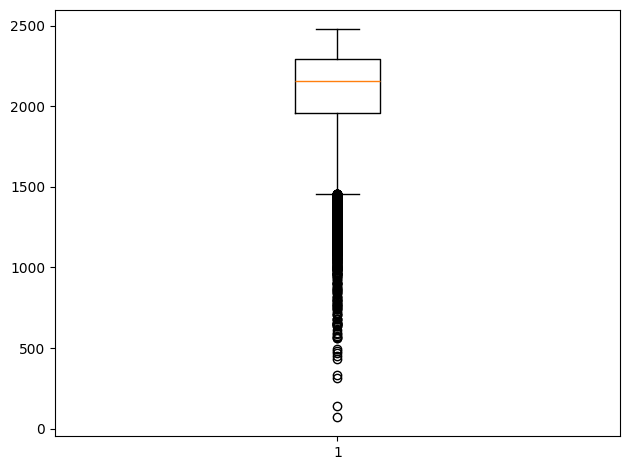

0.33058929557517264
-0.16866785691275865
count    28382.000000
mean        48.208336
std         17.807163
min          1.000000
25%         36.000000
50%         46.000000
75%         60.000000
max         90.000000
Name: age, dtype: float64


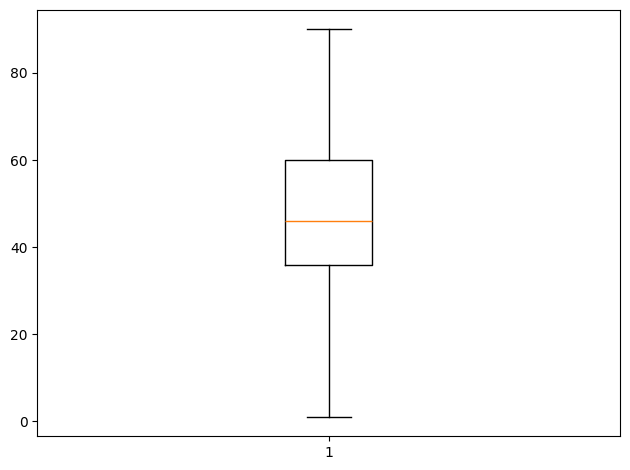

15.405009464799786
661.5669947955845
count    28382.000000
mean         0.349847
std          0.964509
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         52.000000
Name: dependents, dtype: float64


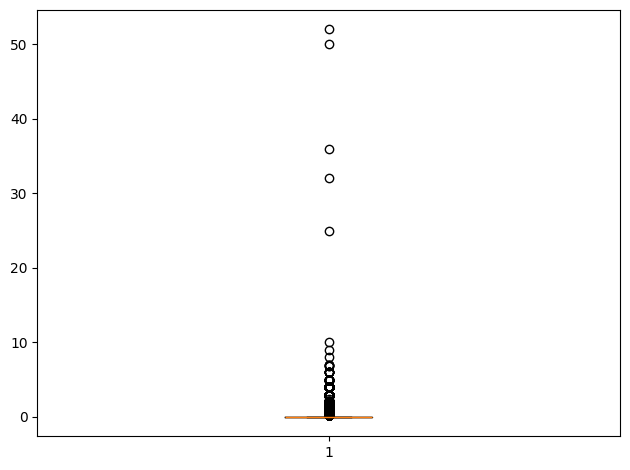

-0.11374791084331248
-0.9256771451262233
count    28382.000000
mean       803.699534
std        430.772927
min          0.000000
25%        409.000000
50%        848.000000
75%       1096.000000
max       1649.000000
Name: city, dtype: float64


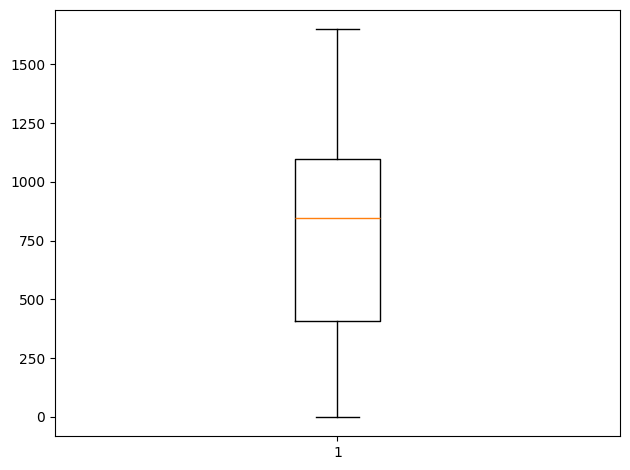

-0.2813785060070178
-0.7688373021880133
count    28382.000000
mean         2.225530
std          0.660443
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: customer_nw_category, dtype: float64


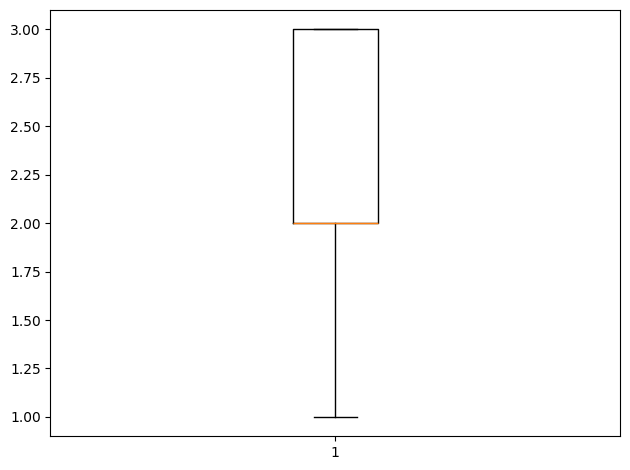

1.2456747651005347
1.0388455898345934
count    28382.000000
mean       925.975019
std        937.799129
min          1.000000
25%        176.000000
50%        572.000000
75%       1440.000000
max       4782.000000
Name: branch_code, dtype: float64


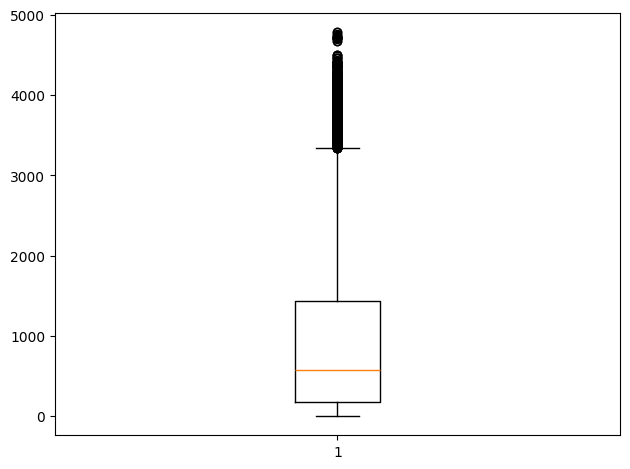

99.03068313758813
13092.359462155644
count    2.838200e+04
mean     7.380552e+03
std      4.259871e+04
min     -5.503960e+03
25%      1.784470e+03
50%      3.281255e+03
75%      6.635820e+03
max      5.905904e+06
Name: current_balance, dtype: float64


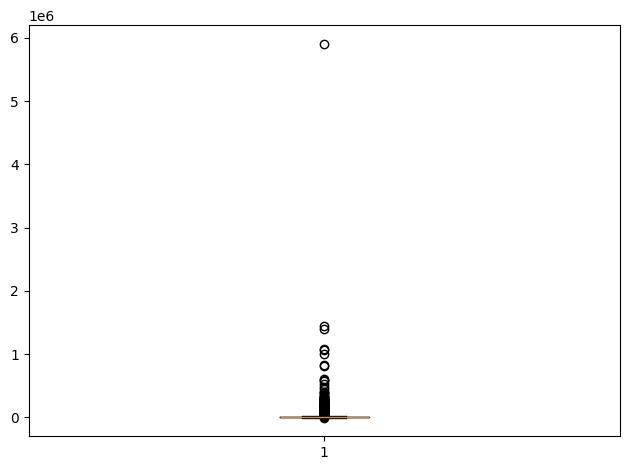

92.94822006691656
11810.199640861943
count    2.838200e+04
mean     7.495771e+03
std      4.252935e+04
min     -3.149570e+03
25%      1.906000e+03
50%      3.379915e+03
75%      6.656535e+03
max      5.740439e+06
Name: previous_month_end_balance, dtype: float64


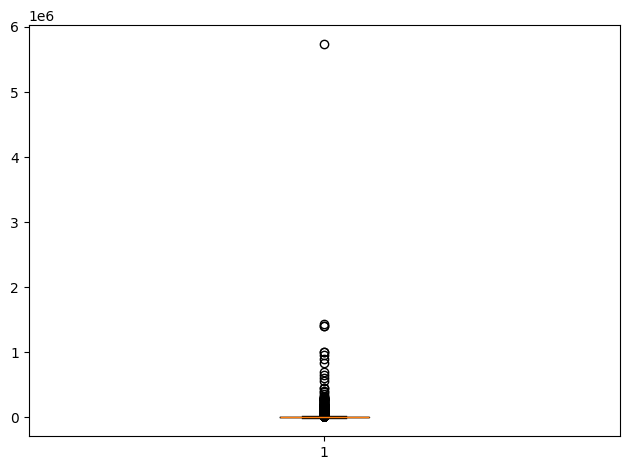

96.64862000174473
12423.454868871399
count    2.838200e+04
mean     7.496780e+03
std      4.172622e+04
min      1.428690e+03
25%      2.180945e+03
50%      3.542865e+03
75%      6.666887e+03
max      5.700290e+06
Name: average_monthly_balance_prevQ, dtype: float64


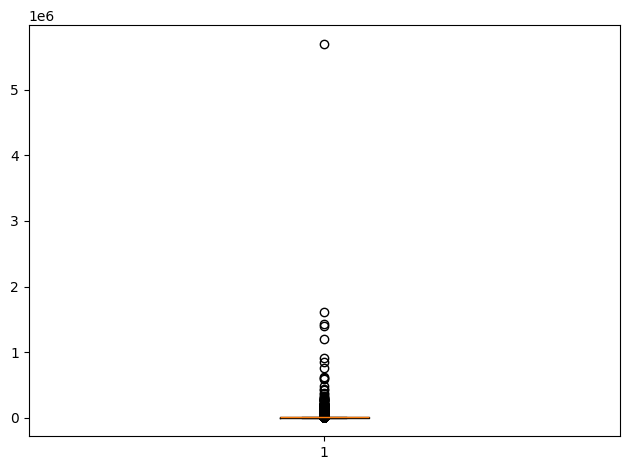

88.89345335549713
9361.911742759861
count    2.838200e+04
mean     7.124209e+03
std      4.457581e+04
min     -1.650610e+04
25%      1.832507e+03
50%      3.359600e+03
75%      6.517960e+03
max      5.010170e+06
Name: average_monthly_balance_prevQ2, dtype: float64


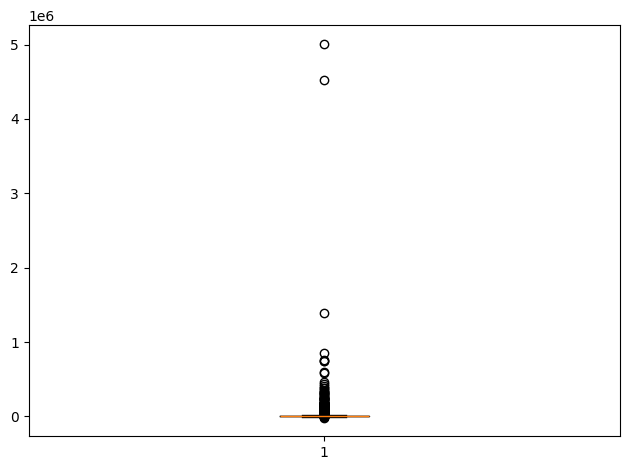

143.3155513073928
22631.41061481843
count    2.838200e+04
mean     3.433252e+03
std      7.707145e+04
min      1.000000e-02
25%      3.100000e-01
50%      6.100000e-01
75%      7.072725e+02
max      1.226985e+07
Name: current_month_credit, dtype: float64


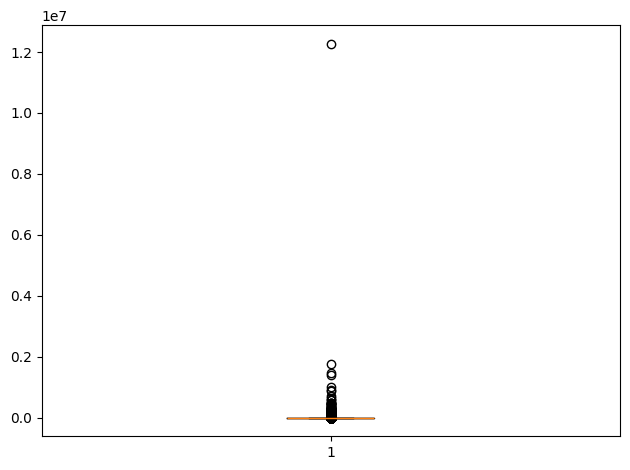

42.56000459765416
2600.3942870922083
count    2.838200e+04
mean     3.261694e+03
std      2.968889e+04
min      1.000000e-02
25%      3.300000e-01
50%      6.300000e-01
75%      7.492350e+02
max      2.361808e+06
Name: previous_month_credit, dtype: float64


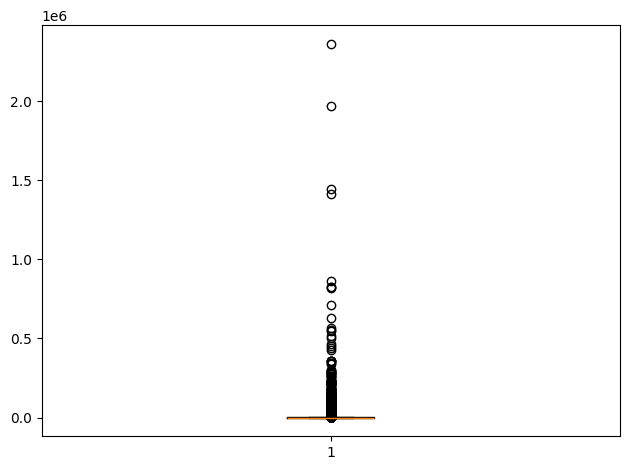

115.62028009490271
16484.93550903477
count    2.838200e+04
mean     3.658745e+03
std      5.198542e+04
min      1.000000e-02
25%      4.100000e-01
50%      9.193000e+01
75%      1.360435e+03
max      7.637857e+06
Name: current_month_debit, dtype: float64


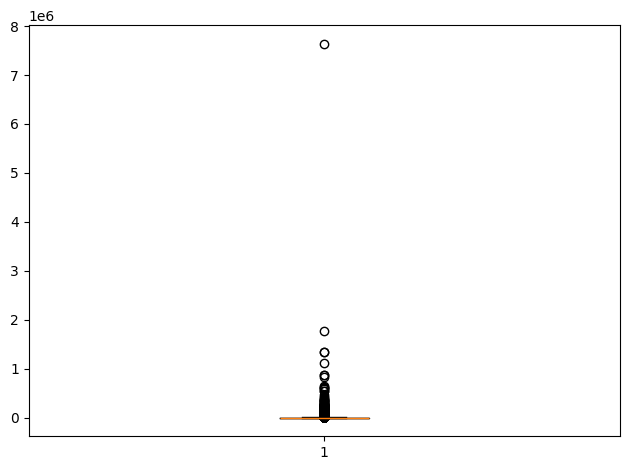

30.6419841054214
1302.6687531441853
count    2.838200e+04
mean     3.339761e+03
std      2.430111e+04
min      1.000000e-02
25%      4.100000e-01
50%      1.099600e+02
75%      1.357553e+03
max      1.414168e+06
Name: previous_month_debit, dtype: float64


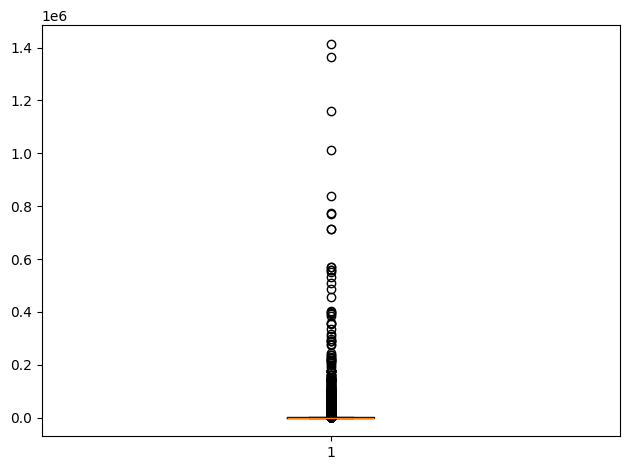

97.31345700157028
12681.159461310452
count    2.838200e+04
mean     7.451133e+03
std      4.203394e+04
min     -3.374180e+03
25%      1.996765e+03
50%      3.447995e+03
75%      6.667958e+03
max      5.778185e+06
Name: current_month_balance, dtype: float64


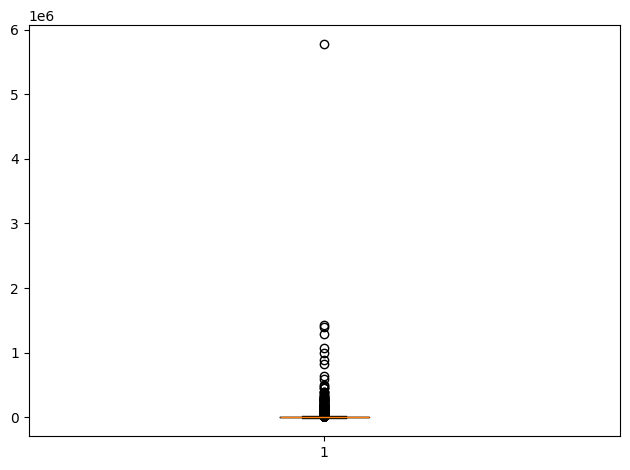

93.39864466369353
11791.988096708279
count    2.838200e+04
mean     7.495177e+03
std      4.243198e+04
min     -5.171920e+03
25%      2.074407e+03
50%      3.465235e+03
75%      6.654693e+03
max      5.720144e+06
Name: previous_month_balance, dtype: float64


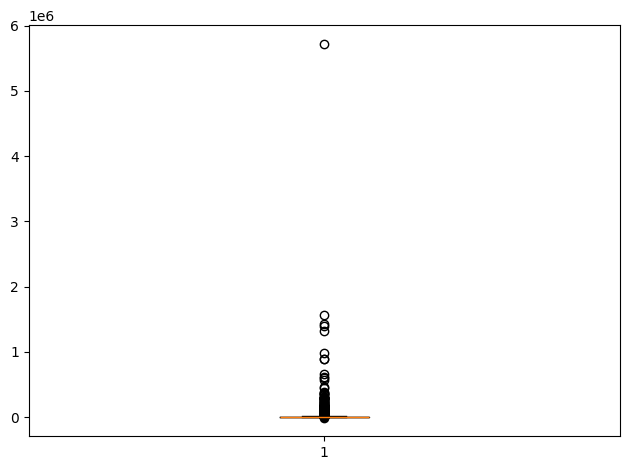

1.6197480587034154
0.6236277140050941
count    28382.000000
mean         0.185329
std          0.388571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64


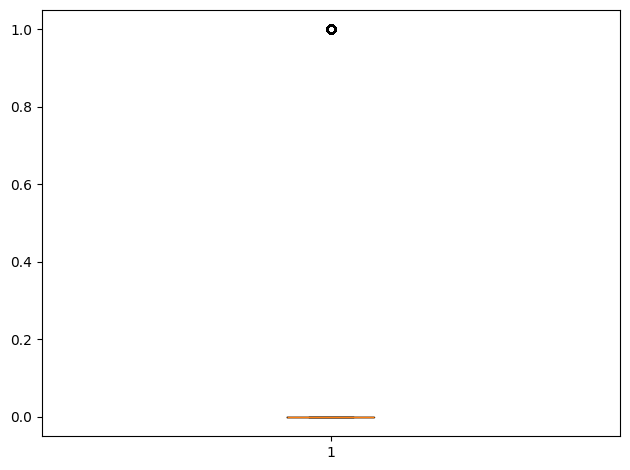

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.select_dtypes(include='number').columns.values:
    print(df[i].skew())
    print(df[i].kurtosis())
    print(df[i].describe())
    plt.boxplot(df[i])
    plt.tight_layout()
    plt.show()

In [13]:
df.dtypes


customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [14]:
df[['occupation','gender']] =df[['occupation','gender']].astype('category')
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

By segmenting columns into separate DataFrames (current_month, previous_month, and average_month), it becomes easier to analyze or process data that belongs to similar categories or time periods independently. This allows for specific analysis, calculations, or visualizations to be performed on each group of related financial

In [15]:
current_month = df[['current_month_debit','current_month_credit','current_month_balance']]
previous_month = df[['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']]
average_month=df[['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']]

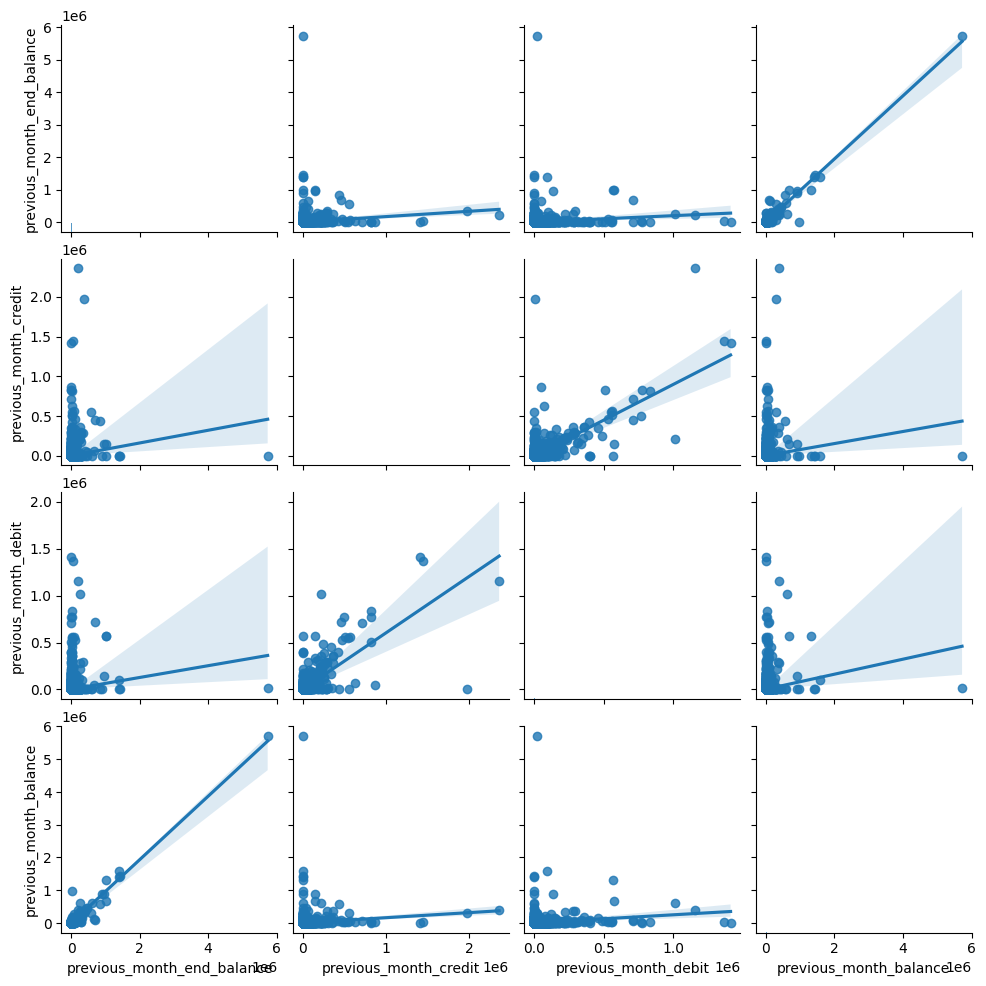

In [16]:
sns.pairplot(previous_month,kind='reg')


pairplots are useful for quickly visualizing relationships between multiple variables in a dataset and identifying potential correlations or patterns, aiding in exploratory data analysis. However, it's important to note that pairplots become less useful as the number of variables increases due to the grid's combinatorial nature.

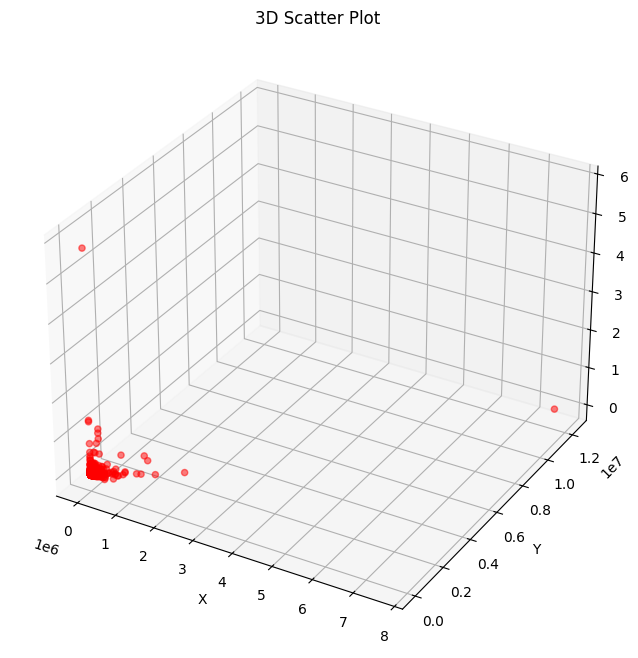

In [17]:
from mpl_toolkits.mplot3d import Axes3D

x = df["current_month_debit"]
y = df['current_month_credit']
z = df['current_month_balance']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='red', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

ax.view_init(elev=30, azim=-60)

plt.show()

3D scatter plots offer a visual tool to comprehend relationships between three variables at once, enabling a deeper understanding of multivariate data and facilitating the exploration of complex relationships within datasets.

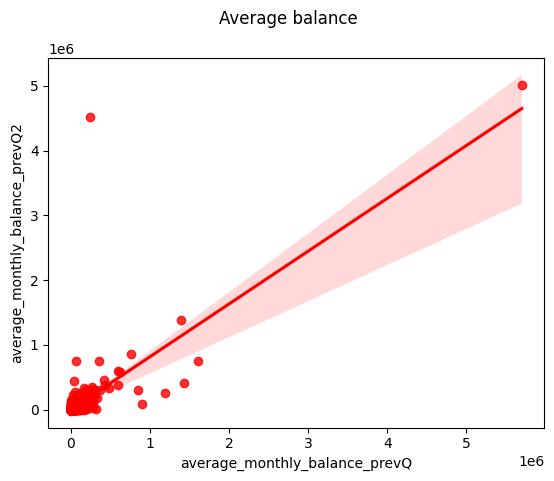

In [18]:


plt.suptitle("Average balance", fontsize=12)
sns.regplot(x='average_monthly_balance_prevQ', y='average_monthly_balance_prevQ2', data=average_month, scatter=True, color='r')
plt.show()

Countplot

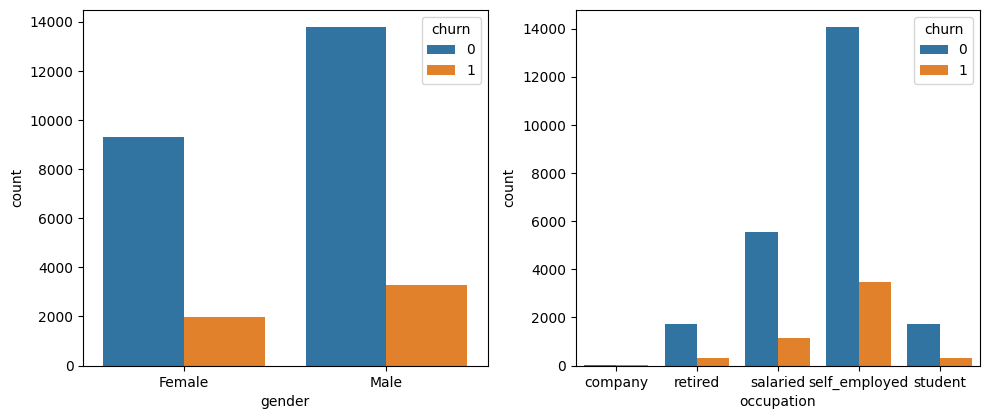

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='gender', hue= 'churn', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'occupation', hue = 'churn', data = df)
plt.tight_layout()
plt.show()

In [20]:
df[['customer_nw_category','churn']]= df[['customer_nw_category','churn']].astype('int')


Data Distribution(Histogram)


array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'vintage'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dependents'}>],
       [<Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'customer_nw_category'}>,
        <Axes: title={'center': 'branch_code'}>,
        <Axes: title={'center': 'current_balance'}>],
       [<Axes: title={'center': 'previous_month_end_balance'}>,
        <Axes: title={'center': 'average_monthly_balance_prevQ'}>,
        <Axes: title={'center': 'average_monthly_balance_prevQ2'}>,
        <Axes: title={'center': 'current_month_credit'}>],
       [<Axes: title={'center': 'previous_month_credit'}>,
        <Axes: title={'center': 'current_month_debit'}>,
        <Axes: title={'center': 'previous_month_debit'}>,
        <Axes: title={'center': 'current_month_balance'}>],
       [<Axes: title={'center': 'previous_month_balance'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >

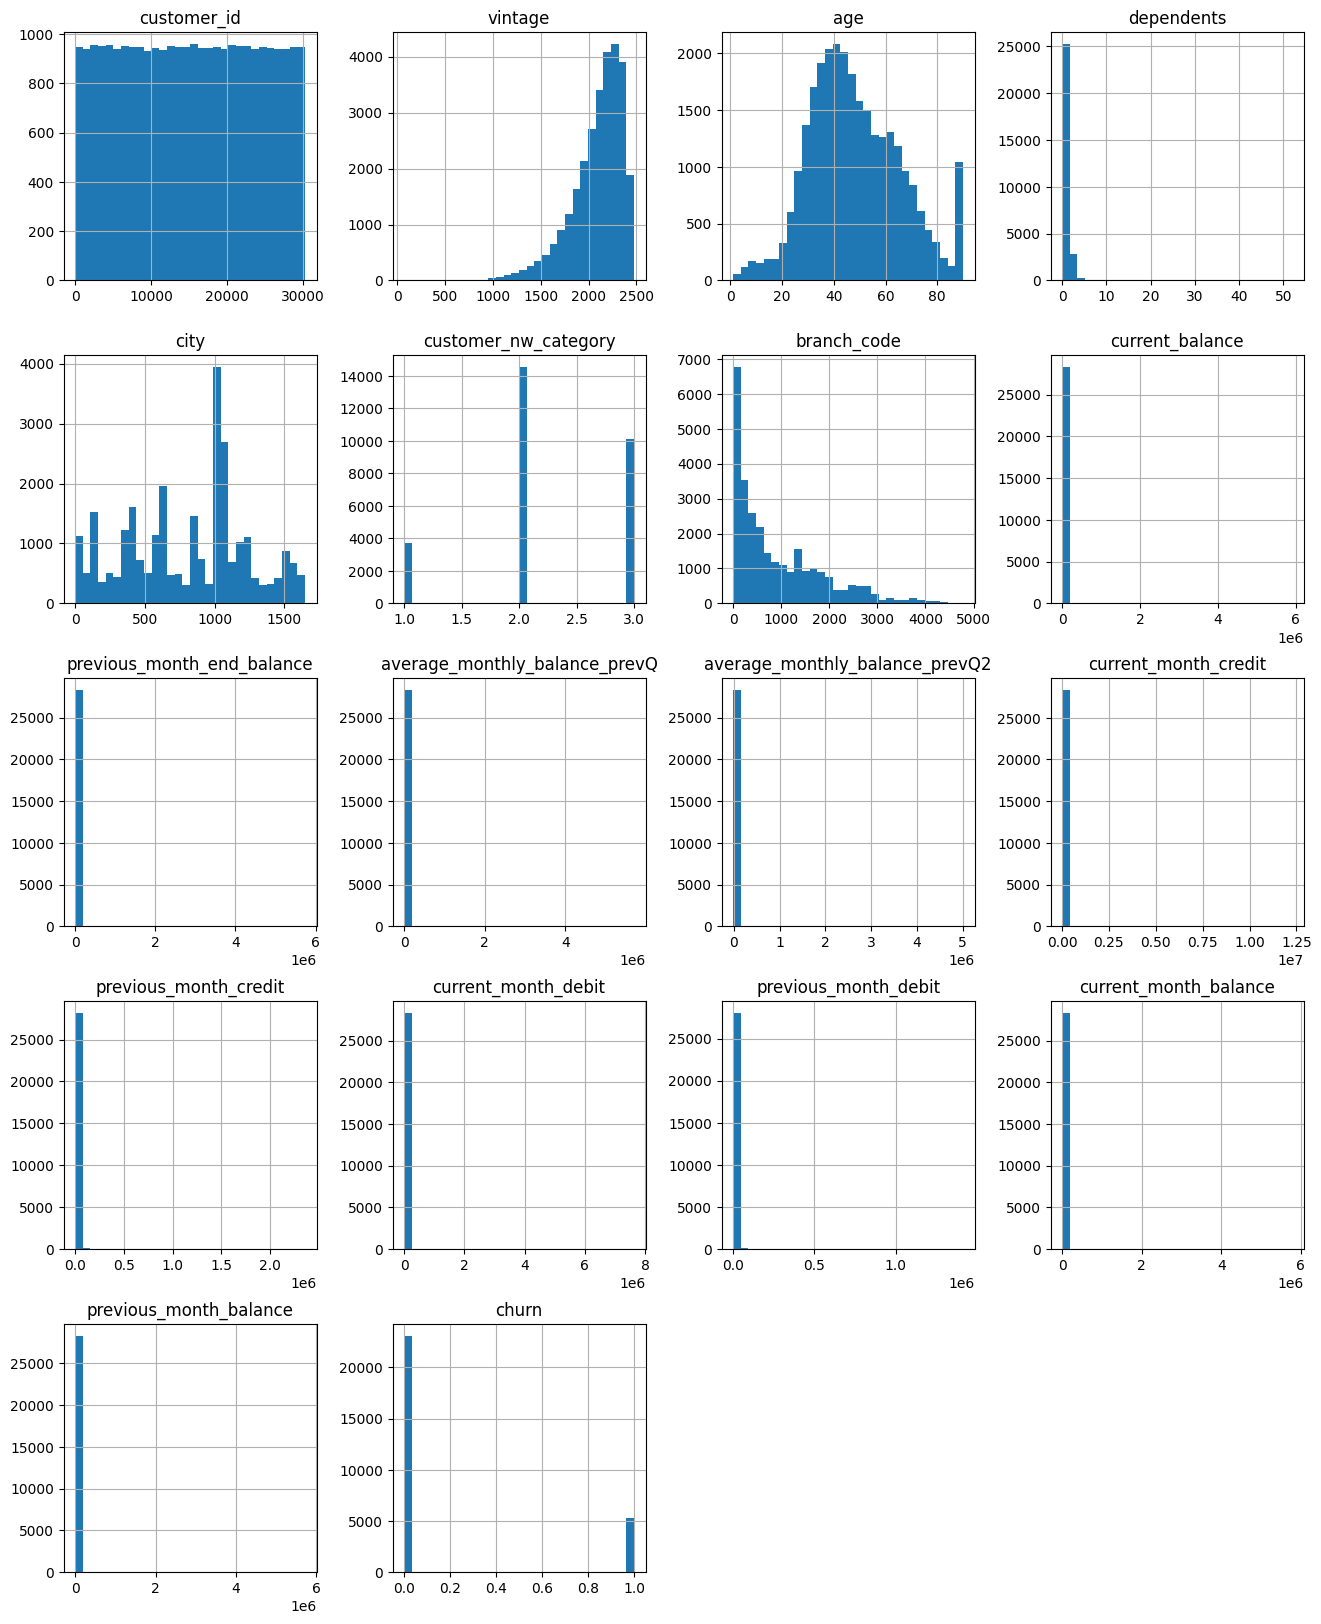

In [21]:
numeric_columns = df.select_dtypes(include = 'number')
numeric_columns.hist(figsize = (16,20),bins = 30)

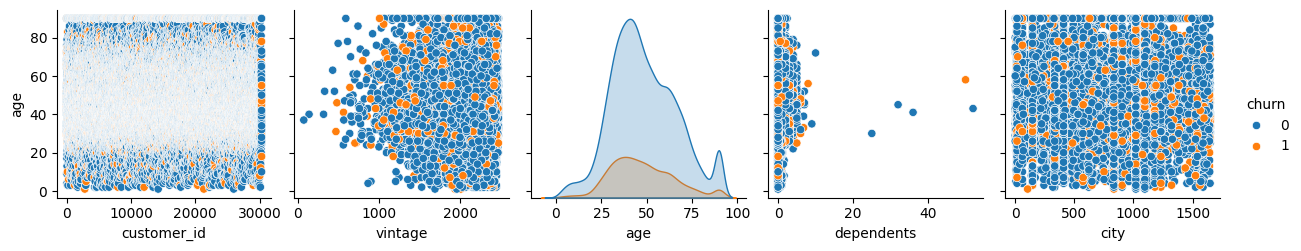

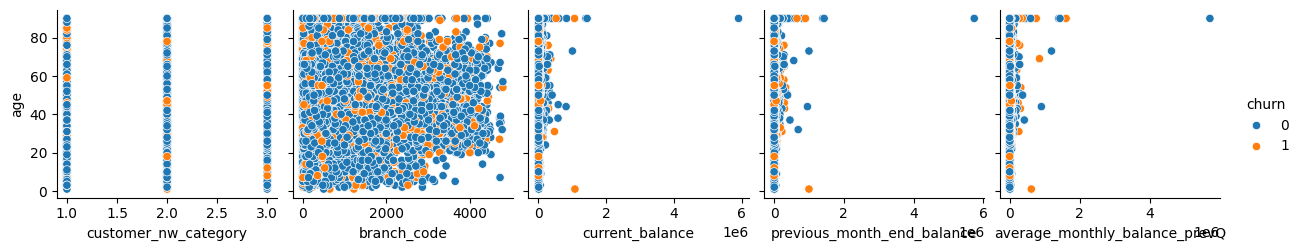

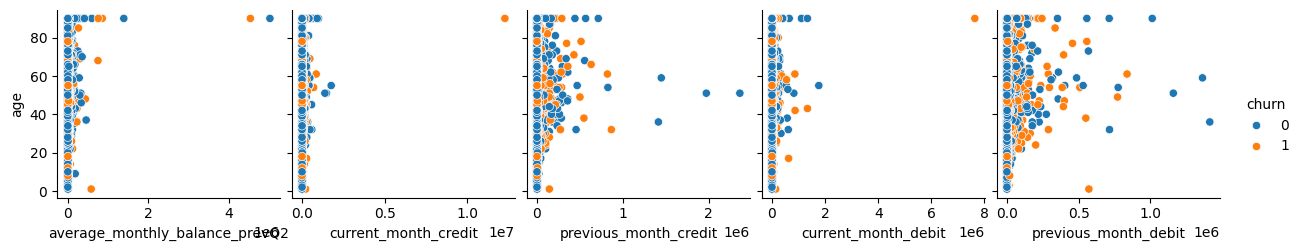

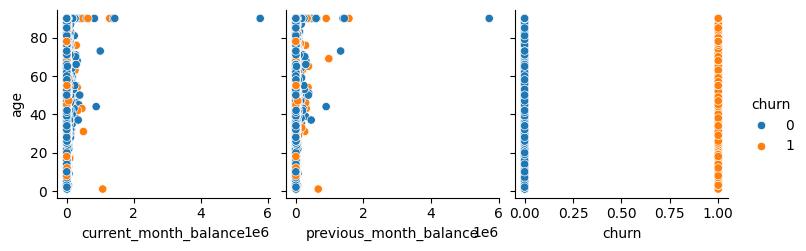

In [22]:
for i  in range(0,len(numeric_columns.columns),5):
    sns.pairplot(data = numeric_columns,hue = 'churn',
                x_vars = numeric_columns.columns[i:i+5],
                y_vars = ['age'])

By creating pair plots for different subsets of numeric columns, this code allows for a comprehensive exploration of relationships between various combinations of numeric variables and age, while also considering the impact of churn status. This visualization can help identify patterns, trends, and potential correlations between the variables, providing valuable insights for further analysis and decision-making.

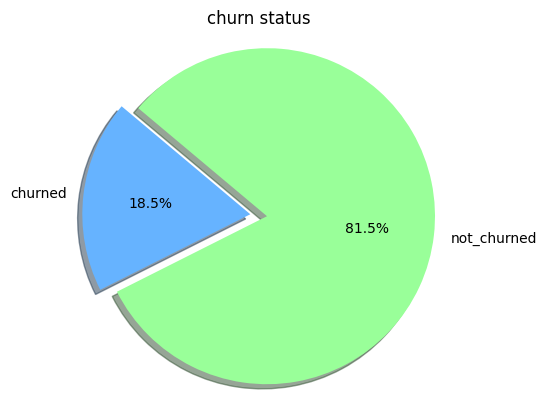

Shows the distribution of churn status in %


In [27]:
total_count = len(df.churn)
churned= (df['churn']==1).sum()
not_churned = total_count-churned


churned_percent = (churned / total_count)*100
not_churned_percent = (not_churned / total_count)*100

labels = ['churned','not_churned']
sizes = [churned_percent,not_churned_percent]
colors = ['#66b3ff','#99ff99']
explode = (0.1,0)
plt.pie(sizes,explode = explode,labels = labels,colors=colors,autopct = '%1.1f%%',shadow = True, startangle=  140)
plt.axis('equal')
plt.title('churn status')
plt.show()
print("Shows the distribution of churn status in %")

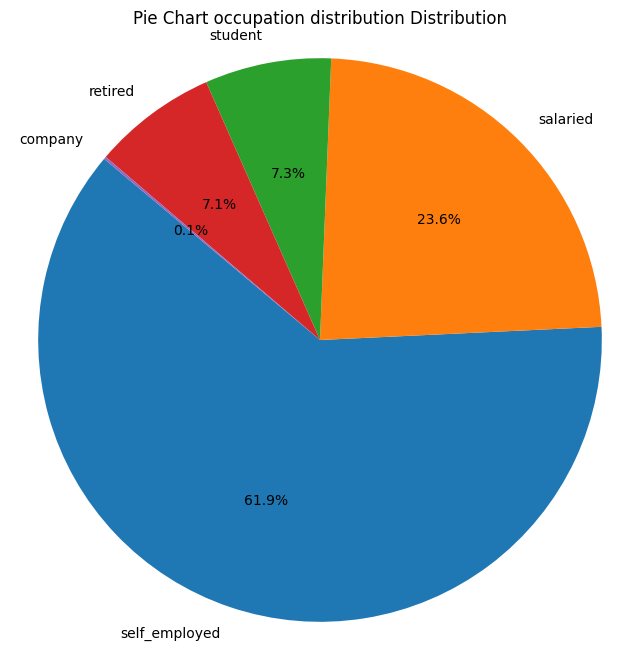

In [24]:
categorical_features = df.select_dtypes(include=['object', 'category'])

category_counts = categorical_features['occupation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart occupation distribution Distribution')
plt.axis('equal')  

plt.show()

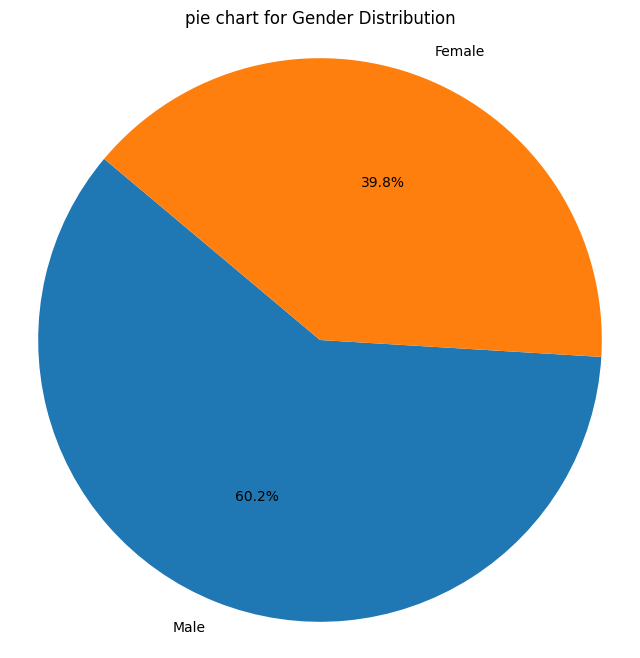

A percentage distribution of Gender in a dataset


In [28]:
category_counts = categorical_features['gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_counts,labels = category_counts.index,autopct = '%1.1f%%',startangle=140)
plt.title('pie chart for Gender Distribution')
plt.axis('equal')

plt.show()
print("A percentage distribution of Gender in a dataset")

Correlation Matrix

A correlation matrix is a table in this case a graph that summarizes the strength and direction of linear relationships between pairs of variables in a dataset. It consists of rows and columns, where each row and column represents a different variable. The cells in the matrix contain correlation coefficients, which measure the degree to which two variables are linearly related. Correlation coefficients range from -1 to 1, with -1 indicating a perfect negative correlation (as one variable increases, the other decreases), 0 indicating no correlation (no linear relationship), and 1 indicating a perfect positive correlation (as one variable increases, the other increases proportionally).

In [29]:
import plotly.express as px
correlation_matrix = df.select_dtypes(include='number').corr()

fig_corr_matrix = px.imshow(correlation_matrix,
                            x=correlation_matrix.columns,
                            y=correlation_matrix.columns,
                            color_continuous_scale='Greens',  
                            title='Interactive Correlation Matrix')

# Customize the layout
fig_corr_matrix.update_layout(width=1200, height=900)
fig_corr_matrix.show()

High Correlation among variables can be a bit of problem while working with machine learning models(will be dealt accordingly)

QQ Plot


A quantile-quantile (QQ) plot, also known as a probability plot, is a graphical tool used to compare two probability distributions. It helps assess whether a dataset plausibly came from a specific theoretical distribution, such as a normal or exponential distribution. QQ plots are particularly useful in exploratory data analysis (EDA) and data visualization.

The purpose of a QQ plot is to compare the quantiles of two distributions. Quantiles divide a distribution into equal-sized proportions. For example, the quartiles of a distribution divide it into four equal-sized portions, and the deciles divide it into ten equal-sized portions.

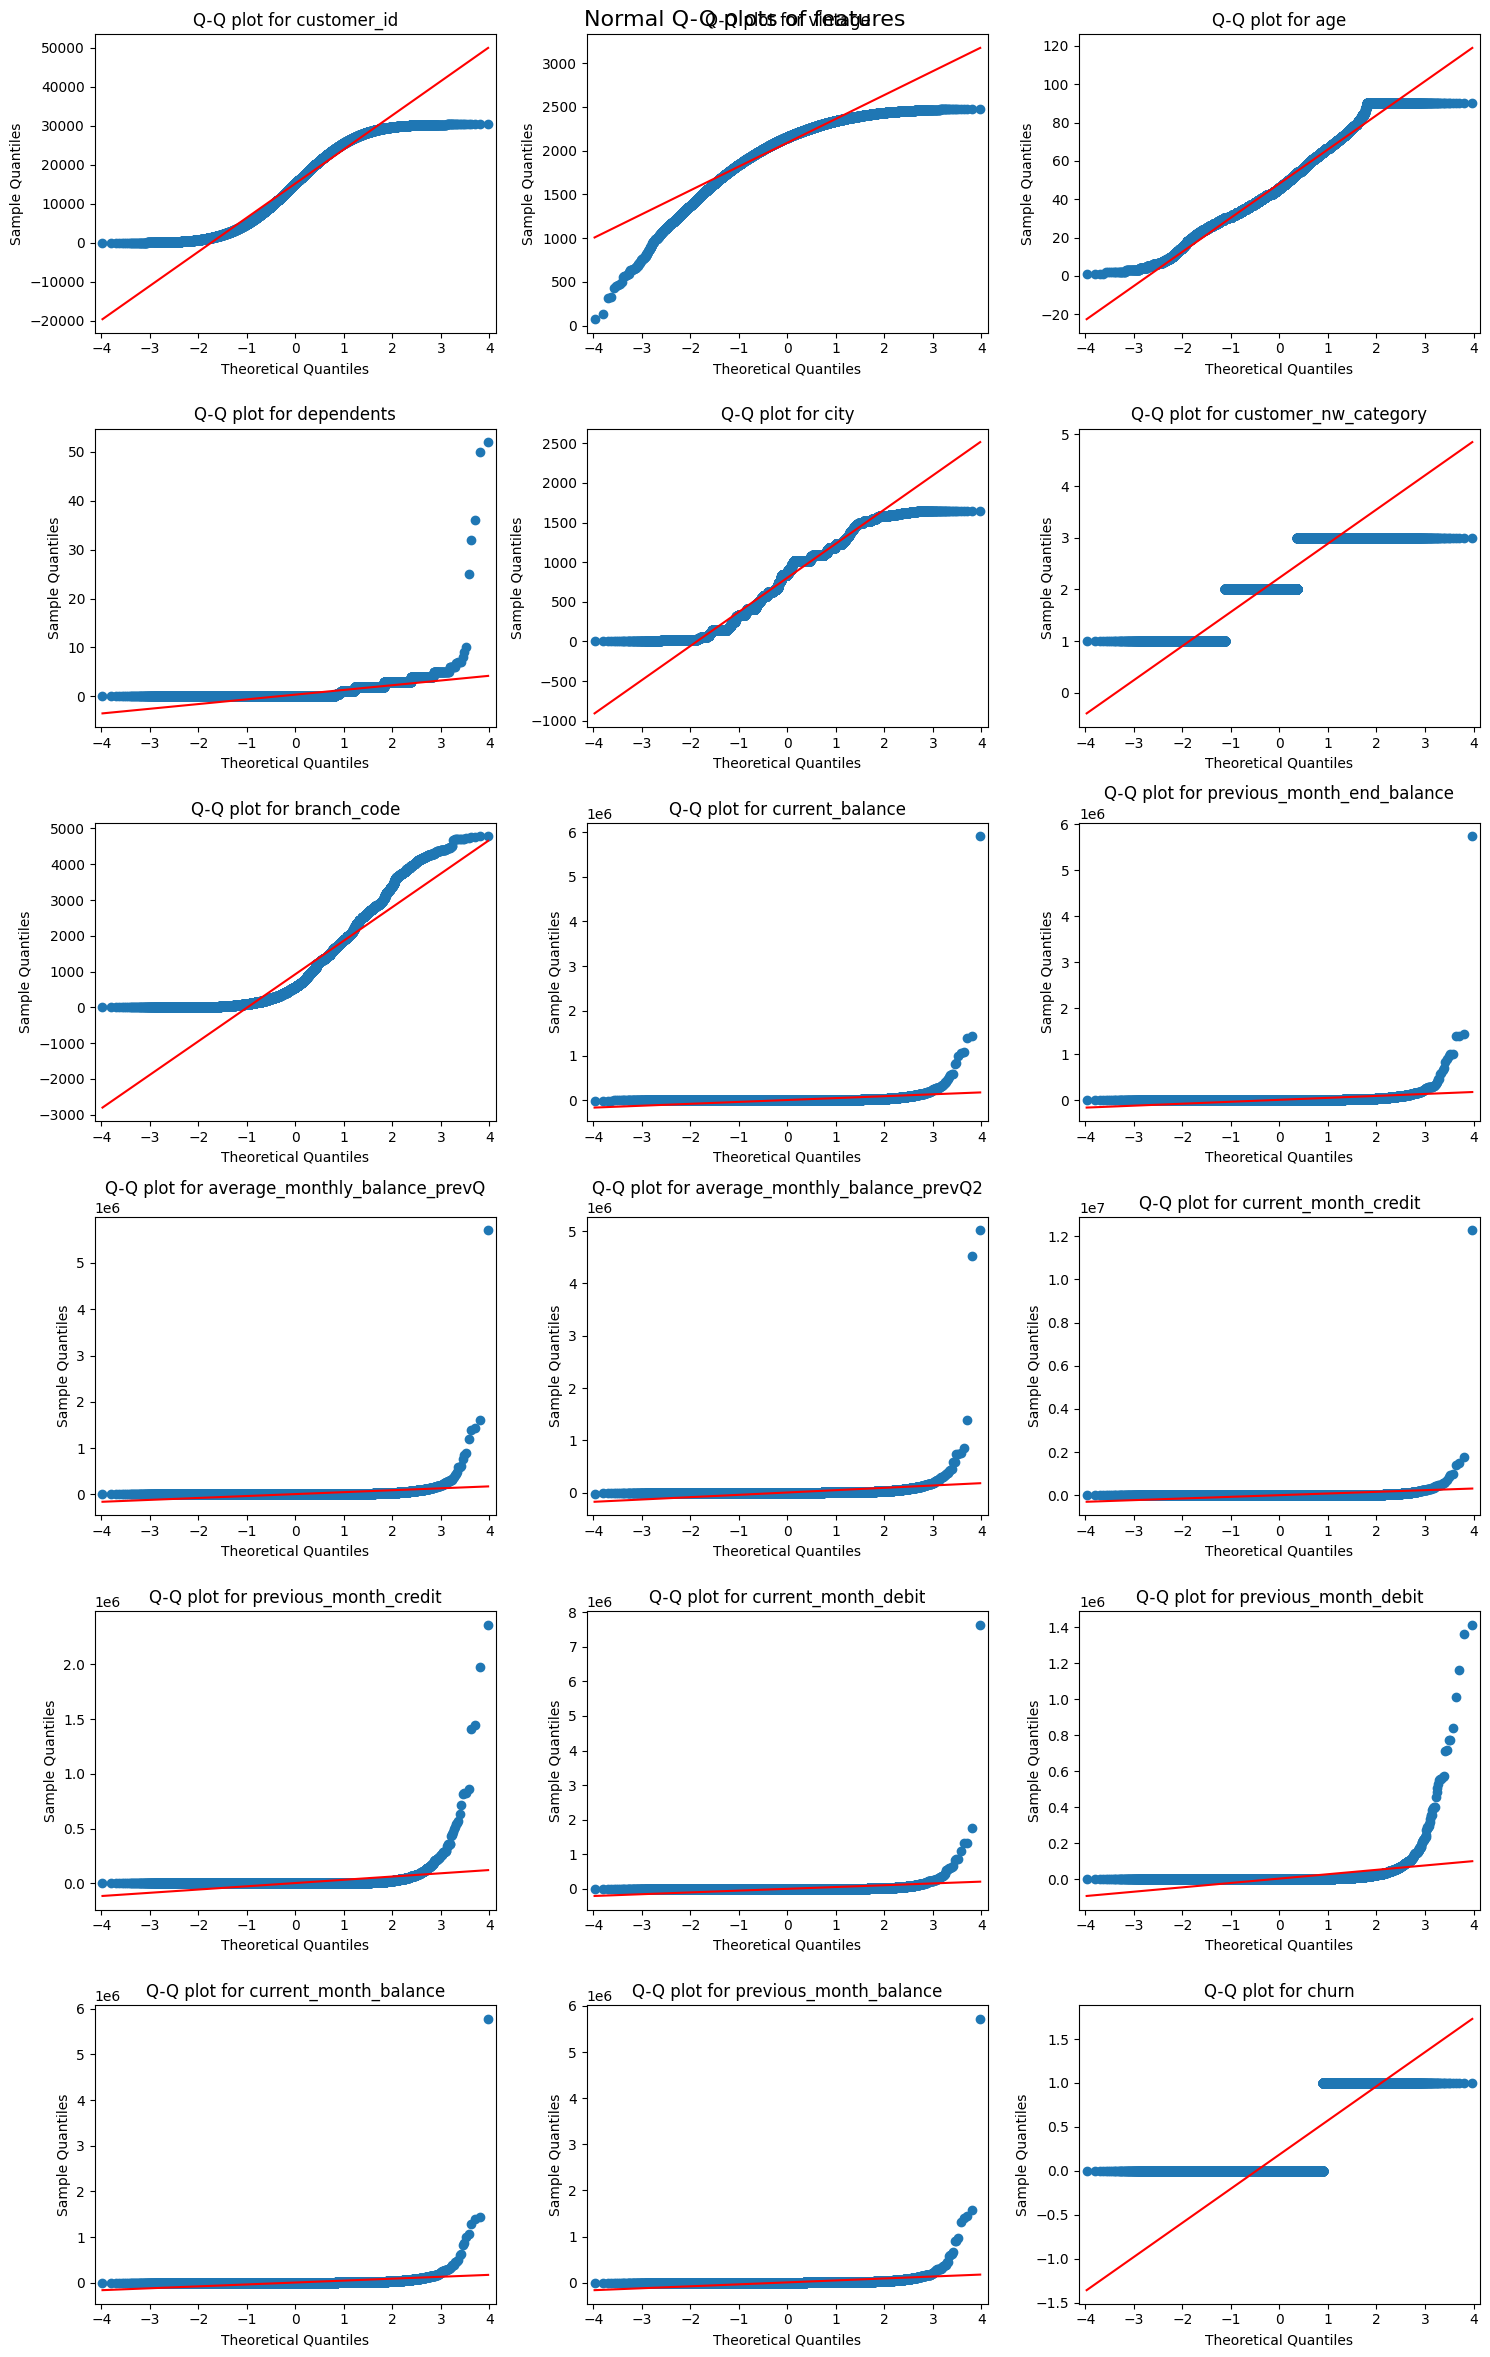

In [31]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
feature_names = numeric_columns.columns.tolist()


def make_univariate_plots(df, factors, title, plot_type):
    n = len(factors)
    ncols = 3  
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    fig.suptitle(title, fontsize=16)

    for i, factor in enumerate(factors):
        ax = axes[i // ncols, i % ncols]
        sm.qqplot(df[factor], line='s', ax=ax)
        ax.set_title(f'Q-Q plot for {factor}')

    plt.tight_layout()
    plt.show()


make_univariate_plots(
    df=numeric_columns,
    factors=feature_names,
    title='Normal Q-Q plots of features',
    plot_type='qq-plot')

Low variance check


Variables with low variance can have several impacts on data analysis and modeling. Here are some of the key effects:

Reduced Predcitive Power
Increased Sensitivity to outliers

In [32]:
from sklearn.feature_selection import VarianceThreshold

numerical_features = numeric_columns
categorical_features = df.select_dtypes(include=['object', 'category'])
selector = VarianceThreshold(threshold=0.01)
selector.fit(numerical_features)
selected_features = selector.get_support()


low_variance_features = list(numerical_features.columns[~selected_features])
print('Features with low Variance ',low_variance_features)

Features with low Variance  []


Analysis

Outliers are a big problem when perofrming any anaysis . Its impacts the other sample population Inter quartile range is a usefull technique to detect the outlier and to either trim the values or cap the values withn upper and lower bound

In [33]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

def cap_outliers_in_dataframe(data):
    capped_df = df.copy()

    for column in capped_df.columns:
        if not pd.api.types.is_numeric_dtype(capped_df[column].dtype):
            continue  

            Q1 = capped_df[column].quantile(0.25)
            Q3 = capped_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            capped_df[column] = np.where(outliers, np.clip(capped_df[column], lower_bound, upper_bound), capped_df[column])

    return capped_df

capped_df = cap_outliers_in_dataframe(df)

In [34]:
capped_df.head(5)


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,1180.6,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,Male,0.0,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


Dealing wiht non important features

Its considered beneficial to drop unimportant features .

1.Reduces Dimentionality 

2.Reduce computation

In [35]:
capped_df=  capped_df.drop(['customer_id','last_transaction'],axis = 1)

In [36]:
capped_df.head(4)


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2348,35,Male,0.0,self_employed,1180.6,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,2329,90,Male,0.0,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1


In [37]:
capped_df.tail(4)


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28378,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,1175,18,Male,0.0,student,1232.0,2,474,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


Aswering important questions

Are certain customer segments more profitable or likely to use specific services?

In [38]:
relevant_columns = ['customer_nw_category', 'occupation', 'current_balance', 'current_month_balance', 'churn']
subset_data = capped_df[relevant_columns]

profitability_analysis = subset_data.groupby(['customer_nw_category', 'occupation']).agg({
    'current_balance': 'mean', 
    'current_month_balance': 'mean'}).reset_index()
profitability_analysis_sorted = profitability_analysis.sort_values(by='current_balance', ascending=False)

profitability_analysis_sorted

C:\Users\91916\AppData\Local\Temp\ipykernel_30336\3018373945.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,customer_nw_category,occupation,current_balance,current_month_balance
0,1,company,19890.738333,18281.226667
2,1,salaried,18291.274650,17573.071100
1,1,retired,12421.362241,13077.825216
3,1,self_employed,12123.739199,12263.899092
8,2,self_employed,8557.297301,8711.378821
7,2,salaried,7136.667703,7144.061817
10,3,company,6261.294706,4129.845882
6,2,retired,6214.781309,6150.178405
5,2,company,6143.115882,5983.934118
4,1,student,5527.503166,5775.469763


Do customers with higher engagement (more transactions, larger balances) tend to stay longer?

In [39]:
relevant_columns = ['current_month_debit', 'current_balance', 'churn']
subset_data = capped_df[relevant_columns]
engagement_churn_analysis = subset_data.groupby('churn').agg({
    'current_month_debit': 'mean',  
    'current_balance': 'mean' 
}).reset_index()
engagement_churn_analysis_sorted = engagement_churn_analysis.sort_values(by='current_balance', ascending=False)
engagement_churn_analysis_sorted

,churn,current_month_debit,current_balance
0,0,2467.586989,7871.852338
1,1,8894.855785,5220.884321


Are there any abnormal patterns in transaction behavior that might indicate fraud?

In [40]:
transaction_columns = ['current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'occupation']
transaction_data = capped_df[transaction_columns]
transaction_anomalies = transaction_data.groupby('occupation').agg({
    'current_month_credit': ['mean', 'std'],  
    'previous_month_credit': ['mean', 'std'], 
    'current_month_debit': ['mean', 'std'],  
    'previous_month_debit': ['mean', 'std'] 
}).reset_index()

C:\Users\91916\AppData\Local\Temp\ipykernel_30336\2254492854.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [41]:
transaction_anomalies

occupation current_month_credit                previous_month_credit  \
                                 mean            std                  mean   
0        company          3087.038250    8442.588256           3160.484250   
1        retired          8091.082376  272974.977993           3073.512762   
2       salaried          2538.502815   15961.849823           2995.418531   
3  self_employed          3542.618720   30205.436458           3652.188765   
4        student           840.814242    4847.347723            984.981118   

                current_month_debit                previous_month_debit  \
            std                mean            std                 mean   
0  11771.667705         1594.602000    3450.486356           757.354000   
1  22169.345103         6097.118192  170277.383296          2669.948039   
2  24064.183555         3148.759500   25004.228273          2983.770261   
3  33807.823965         3886.562603   28014.685547          3820.196009   
4   5212.203596         1018.639329    4705.188590          1109.951778   

                 
            std  
0   1912.500271  
1  16477.614278  
2  21364.281557  
3  27269.275671  
4   6271.665839

How do age, gender, and occupation influence customer behavior or account usage?

In [42]:
relevant_columns = ['age', 'gender', 'occupation', 'current_balance', 'current_month_credit', 'current_month_debit', 'churn']
subset_data = capped_df[relevant_columns]
age_gender_occupation_analysis = subset_data.groupby(['age', 'gender', 'occupation']).agg({
    'current_balance': 'mean',  
    'current_month_credit': 'mean',  
    'current_month_debit': 'mean', 
    'churn': 'mean'  
})

C:\Users\91916\AppData\Local\Temp\ipykernel_30336\116183117.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [43]:
age_gender_occupation_analysis


current_balance  current_month_credit  \
age gender occupation                                             
1   Female company                    NaN                   NaN   
           retired                    NaN                   NaN   
           salaried                   NaN                   NaN   
           self_employed              NaN                   NaN   
           student            5360.415000              0.335000   
...                                   ...                   ...   
90  Male   company            6254.753000           2754.782500   
           retired            7388.786136         280381.443409   
           salaried           4152.802500              0.325000   
           self_employed     29260.110759           8846.066217   
           student                    NaN                   NaN   

                          current_month_debit     churn  
age gender occupation                                    
1   Female company                        NaN       NaN  
           retired                        NaN       NaN  
           salaried                       NaN       NaN  
           self_employed                  NaN       NaN  
           student                   0.335000  0.000000  
...                                       ...       ...  
90  Male   company                1805.659500  0.050000  
           retired              175342.249545  0.136364  
           salaried                162.110000  0.000000  
           self_employed          9527.512482  0.184337  
           student                        NaN       NaN  

[900 rows x 4 columns]

How does customer segmentation relate to churn?


C:\Users\91916\AppData\Local\Temp\ipykernel_30336\2073876424.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



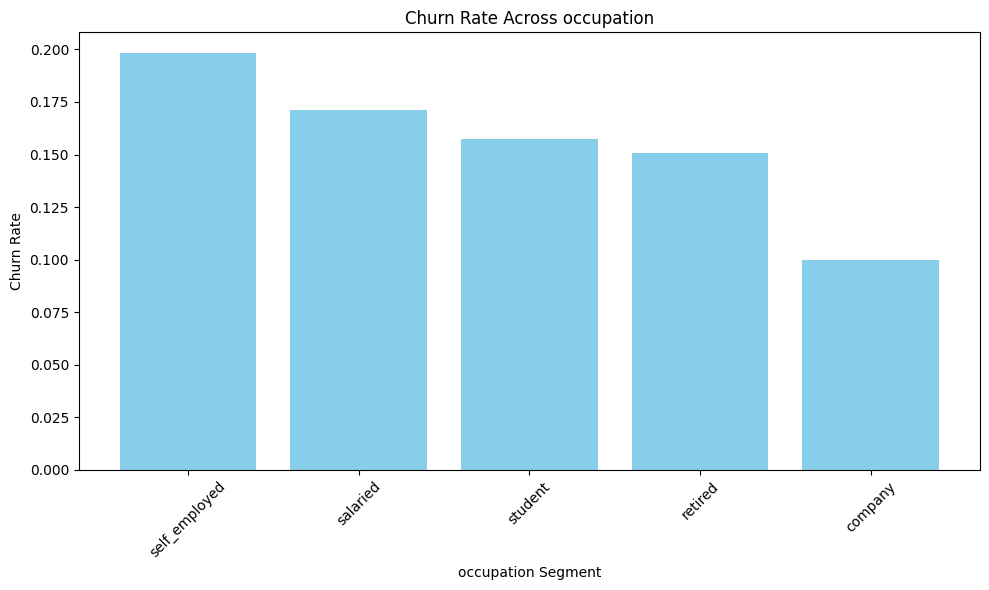

C:\Users\91916\AppData\Local\Temp\ipykernel_30336\2073876424.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



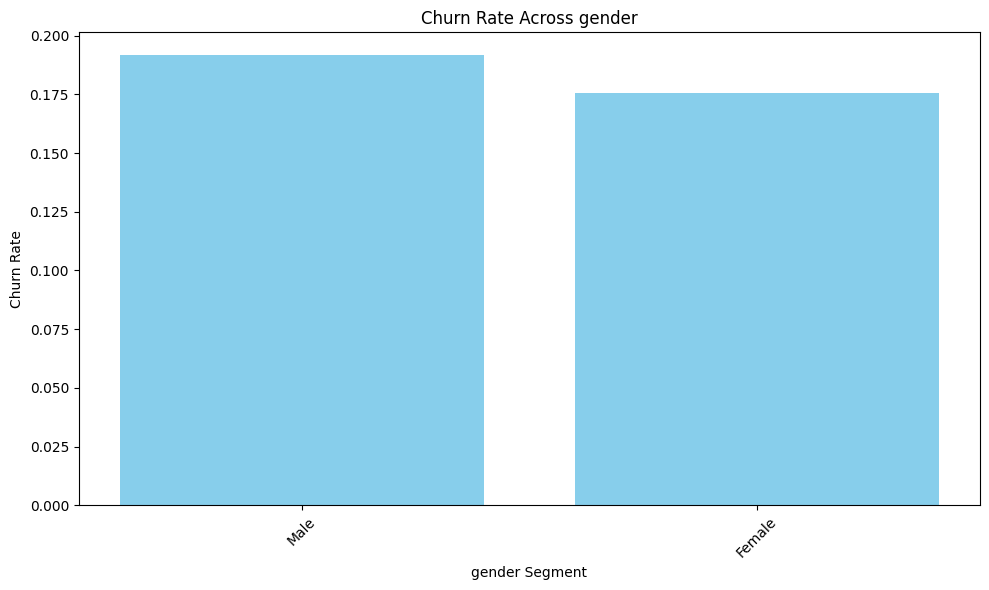

In [44]:
relevant_columns = ['occupation','gender', 'churn']

subset_data = capped_df[relevant_columns]

segment_churn_rate = subset_data.groupby('occupation')['churn'].mean().reset_index()

segment_churn_rate = segment_churn_rate.sort_values(by='churn', ascending=False)

# Plotting the churn rates per segment
plt.figure(figsize=(10, 6))
plt.bar(segment_churn_rate['occupation'], segment_churn_rate['churn'], color='skyblue')
plt.xlabel('occupation Segment')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Across occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

relevant_columns = ['occupation','gender', 'churn']

subset_data = capped_df[relevant_columns]

segment_churn_rate = subset_data.groupby('gender')['churn'].mean().reset_index()

segment_churn_rate = segment_churn_rate.sort_values(by='churn', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(segment_churn_rate['gender'], segment_churn_rate['churn'], color='skyblue')
plt.xlabel('gender Segment')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Across gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data preprocessing

Features with High correlation

Features with high correlation tend to provide redundant information, as they capture similar patterns in the data. This can lead to overfitting in machine learning models, where the models become too closely aligned with the training data and perform poorly on unseen data.

In [45]:
threshold = 0.8
corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_features.add(colname)

capped_df.drop(corr_features, axis=1, inplace=True)

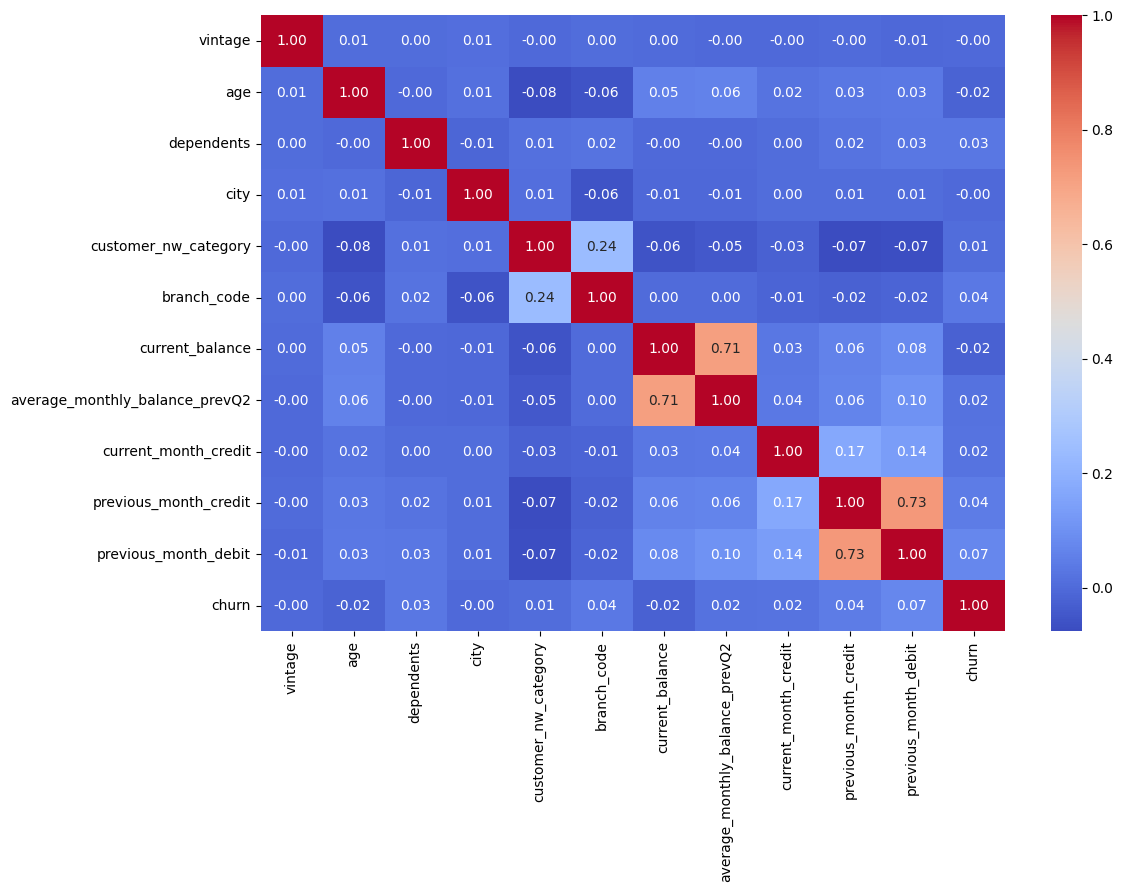

The above correlation matrix show the total features after dropping highly correlated features


In [48]:
correlation_matrix = capped_df.select_dtypes(include='number').corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
print("The above correlation matrix show the total features after dropping highly correlated features")

In [49]:
capped_df.shape


(28382, 14)

In [50]:
capped_df.head(5)


,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,previous_month_debit,churn
0,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1449.07,0.20,0.20,0.20,0
1,2348,35,Male,0.0,self_employed,1180.6,2,3214,5390.37,12419.41,0.56,0.56,100.56,0
2,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,2815.94,0.61,0.61,259.23,0
3,2329,90,Male,0.0,self_employed,1020.0,2,582,2291.91,1006.54,0.47,0.47,2143.33,1
4,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1871.12,0.33,714.61,1538.06,1


Encode categorical variables

In [51]:
capped_df.dtypes


vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                               float64
customer_nw_category                 int32
branch_code                          int64
current_balance                    float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
previous_month_debit               float64
churn                                int32
dtype: object

Hot Encoding

Hot encoding, also known as one-hot encoding, is a method of encoding categorical data into a numerical format that can be processed by machine learning algorithms. Categorical data represents variables that can take on distinct categories or labels, such as gender (male, female), color (red, green, blue), or animal type (dog, cat, bird).

In machine learning, categorical data cannot be directly used as input to algorithms that require numerical inputs. This is because machine learning algorithms operate on mathematical relationships between numerical values. Hot encoding converts each category of a categorical variable into a separate binary vector, where each vector has a length equal to the number of unique categories in the variable.

In [53]:
columns_to_encode = ['gender','occupation']
capped_df = pd.get_dummies(capped_df, columns=columns_to_encode,drop_first=True)

In [54]:
capped_df.head()


,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,previous_month_debit,churn,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,0.0,187.0,2,755,1458.71,1449.07,0.20,0.20,0.20,0,True,False,False,True,False
1,2348,35,0.0,1180.6,2,3214,5390.37,12419.41,0.56,0.56,100.56,0,True,False,False,True,False
2,2194,31,0.0,146.0,2,41,3913.16,2815.94,0.61,0.61,259.23,0,True,False,True,False,False
3,2329,90,0.0,1020.0,2,582,2291.91,1006.54,0.47,0.47,2143.33,1,True,False,False,True,False
4,1579,42,2.0,1494.0,3,388,927.72,1871.12,0.33,714.61,1538.06,1,True,False,False,True,False


Data Split

splitting data into x and y is a fundamental practice in machine learning that serves multiple purposes: preventing overfitting, facilitating model training and optimization, enabling feature engineering and transformation, and promoting interpretability. This separation allows us to work with the data more effectively and develop models that are both accurate and generalizable.

In [55]:
x =capped_df.drop(['churn'],axis = 1)
y = capped_df['churn']

Feature Scalling


Feature scaling is a crucial data preprocessing step in machine learning that transforms the numerical features of a dataset to a common scale. This standardization ensures that all features have a consistent range of values, which can significantly improve the performance of many machine learning algorithms.

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(x)
x = pd.DataFrame(df_scaled, columns=x.columns)

SMOTE(Synthetic Miniority Oversampling)

SMOTE, or Synthetic Minority Oversampling Technique, is a data augmentation technique used to address imbalanced datasets. Imbalanced datasets are those where there is a significant difference in the number of samples in one or more classes compared to others. This can cause problems for machine learning algorithms, as they may learn to favor the majority class and ignore the minority class.

In [57]:
y.value_counts()


churn
0    23122
1     5260
Name: count, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x,y)

In [60]:
y_resampled.value_counts()


churn
0    23122
1    23122
Name: count, dtype: int64

Feature Importance

Analyzing feature importance helps shed light on the factors that significantly influence the model's predictions. This understanding enhances model interpretability, making it easier to explain the model's decision-making process and gain insights into the underlying relationships between features and the target variable.

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test =train_test_split(x_resampled,y_resampled,test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
feature_importance = model.feature_importances_

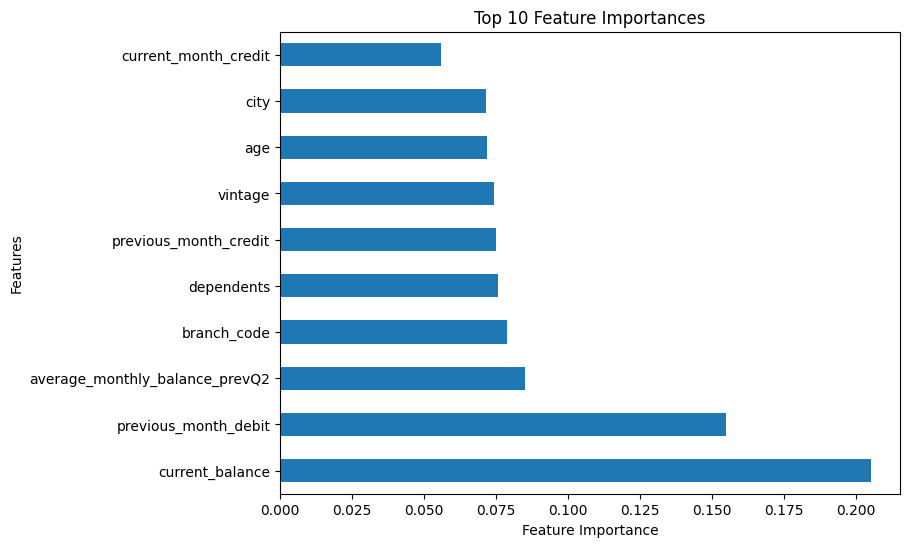

In [64]:
#Plotting the feature importance
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(model.feature_importances_, index=x_resampled.columns).nlargest(10)
feature_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()

Identifying important features can guide feature selection and feature engineering. By removing irrelevant or redundant features, we can reduce the complexity of the model, potentially improving its performance and reducing overfitting. Additionally, constructing new features based on combinations of important features can further enhance the model's predictive power.

In [65]:
feature_importances


current_balance                   0.205219
previous_month_debit              0.154813
average_monthly_balance_prevQ2    0.085189
branch_code                       0.078979
dependents                        0.075743
previous_month_credit             0.074911
vintage                           0.074198
age                               0.071894
city                              0.071509
current_month_credit              0.055980
dtype: float64

In [66]:
x = capped_df[['current_balance',                   
               'previous_month_debit',              
               'average_monthly_balance_prevQ2',    
               'dependents',                       
               'branch_code',                      
               'vintage',                          
               'age',                               
               'previous_month_credit',            
               'city',                              
               'current_month_credit']]
y = capped_df['churn']

Random Forest Classifier

We applying feature scalling and SMOTE to our selected features

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(x)
x = pd.DataFrame(df_scaled, columns=x.columns)

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x,y)

In [69]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


x_train,x_test, y_train,y_test =train_test_split(x_resampled,y_resampled,test_size = 0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30 , max_depth=20, random_state =42)

clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
print(classification_report(y_test,y_pred))

accuracy: 0.8266839658341443
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4689
           1       0.82      0.83      0.83      4560

    accuracy                           0.83      9249
   macro avg       0.83      0.83      0.83      9249
weighted avg       0.83      0.83      0.83      9249



Interpretation


The proportion of correct predictions made by the model. In this case, the accuracy is 0.823, which means that the model correctly predicted 82.3% of the test data points.

Precision: The proportion of positive predictions that are actually correct. In this case, the precision for class 0 is 0.83 and for class 1 is 0.82. This means that 83% of the time the model predicted class 0, it was actually correct, and 82% of the time the model predicted class 1, it was actually correct.

Recall: The proportion of actual positive cases that are correctly identified by the model. In this case, the recall for class 0 is 0.82 and for class 1 is 0.83. This means that 82% of the time the test data point was actually class 0, the model correctly predicted class 0, and 83% of the time the test data point was actually class 1, the model correctly predicted class 1.

F1-score: The harmonic mean of precision and recall. In this case, the F1-score for class 0 is 0.82 and for class 1 is 0.82. This means that the model is performing well at identifying both class 0 and class 1.

Support: The number of data points in each class. In this case, there are 4689 data points in class 0 and 4560 data points in class 1.